<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/17324_1000_Fundus_laterality_images_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split')

['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/train')

['right eye fundus', 'left eye fundus']

In [67]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/train',
                                          target_size=(224,224))
validationimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/val',
                                          target_size=(224,224))
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/test',
                                          target_size=(224,224))

Found 892 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [68]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               input_shape=(224,224,3),
                               weights='imagenet')
VGG.trainable=False

In [69]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               6422784   
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 2)                 514       
                                                                 
Total params: 21203778 (80.89 MB)
Trainable params: 6489090 (24.75 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [70]:
model.fit(trainimages,
          batch_size=32,
          epochs=5,
          validation_data=validationimages)
model.save('funduslaterality_model.keras')

Epoch 1/5
28/28 [==============================] - 628s 22s/step - loss: 1.7872 - accuracy: 0.9148 - val_loss: 0.5480 - val_accuracy: 0.9818
Epoch 2/5
28/28 [==============================] - 617s 22s/step - loss: 0.4130 - accuracy: 0.9765 - val_loss: 0.8686 - val_accuracy: 0.9636
Epoch 3/5
28/28 [==============================] - 626s 22s/step - loss: 0.2454 - accuracy: 0.9888 - val_loss: 0.8871 - val_accuracy: 0.9818
Epoch 4/5
28/28 [==============================] - 622s 22s/step - loss: 0.2073 - accuracy: 0.9888 - val_loss: 0.8077 - val_accuracy: 0.9909
Epoch 5/5
28/28 [==============================] - 622s 22s/step - loss: 0.1745 - accuracy: 0.9865 - val_loss: 1.8964 - val_accuracy: 0.9455


In [ ]:
y_pred = model.predict(testimages)
y_pred

In [72]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0])

In [73]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [74]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[31, 26],
       [28, 28]])

In [75]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53        57
           1       0.52      0.50      0.51        56

    accuracy                           0.52       113
   macro avg       0.52      0.52      0.52       113
weighted avg       0.52      0.52      0.52       113



In [ ]:
testimages.class_indices

{'left eye fundus': 0, 'right eye fundus': 1}

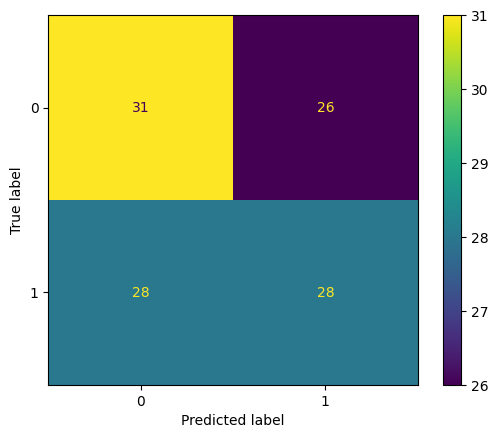

In [79]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

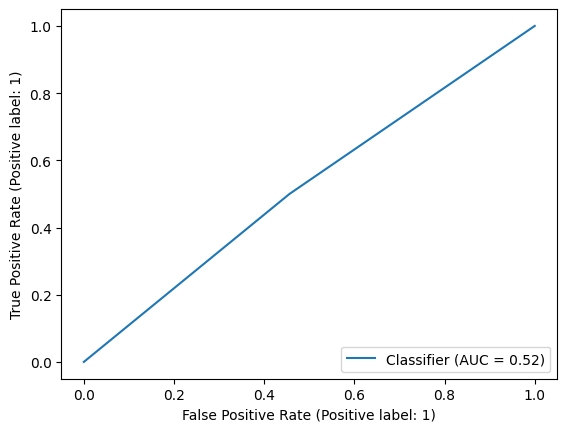

In [76]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred1)

In [78]:
from keras.preprocessing import image
from keras.models import load_model

# Load the trained CNN model
model = load_model('/content/funduslaterality_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224,224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["left eye fundus", "right eye fundus"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Normal Fundus Images/left eye fundus/1034_left.jpg"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)


1/1 [==============================] - 1s 1s/step
Prediction: left eye fundus


In [80]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))  # Assuming 1000 classes for ImageNet

model.compile()
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                               

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def VGG16():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='softmax'))  # Assuming 1000 classes for ImageNet

    return model

# Create VGG16 model
vgg16_model = VGG16()

# Display model summary
vgg16_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                               